In [2]:
!pip install seaborn
!pip install scikit-learn

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import train_test_split
from scipy import stats as st


In [4]:
heartData=pd.read_csv('/workspaces/CIT651WorkingSpace/Assignment 4/heart.csv')
heartData.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
heartData.drop(columns=["target"])

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


/tmp/ipykernel_40666/279123001.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(heartData['age'])
/tmp/ipykernel_40666/279123001.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(heartData['sex'])


/tmp/ipykernel_40666/279123001.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(heartData['cp'])
/tmp/ipykernel_40666/279123001.py:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(heartData['trestbps'])
/tmp/ipykernel_40666/279123001.py:16: UserWarning: 

`distplot` is a deprecated function

<Axes: xlabel='slope', ylabel='Density'>

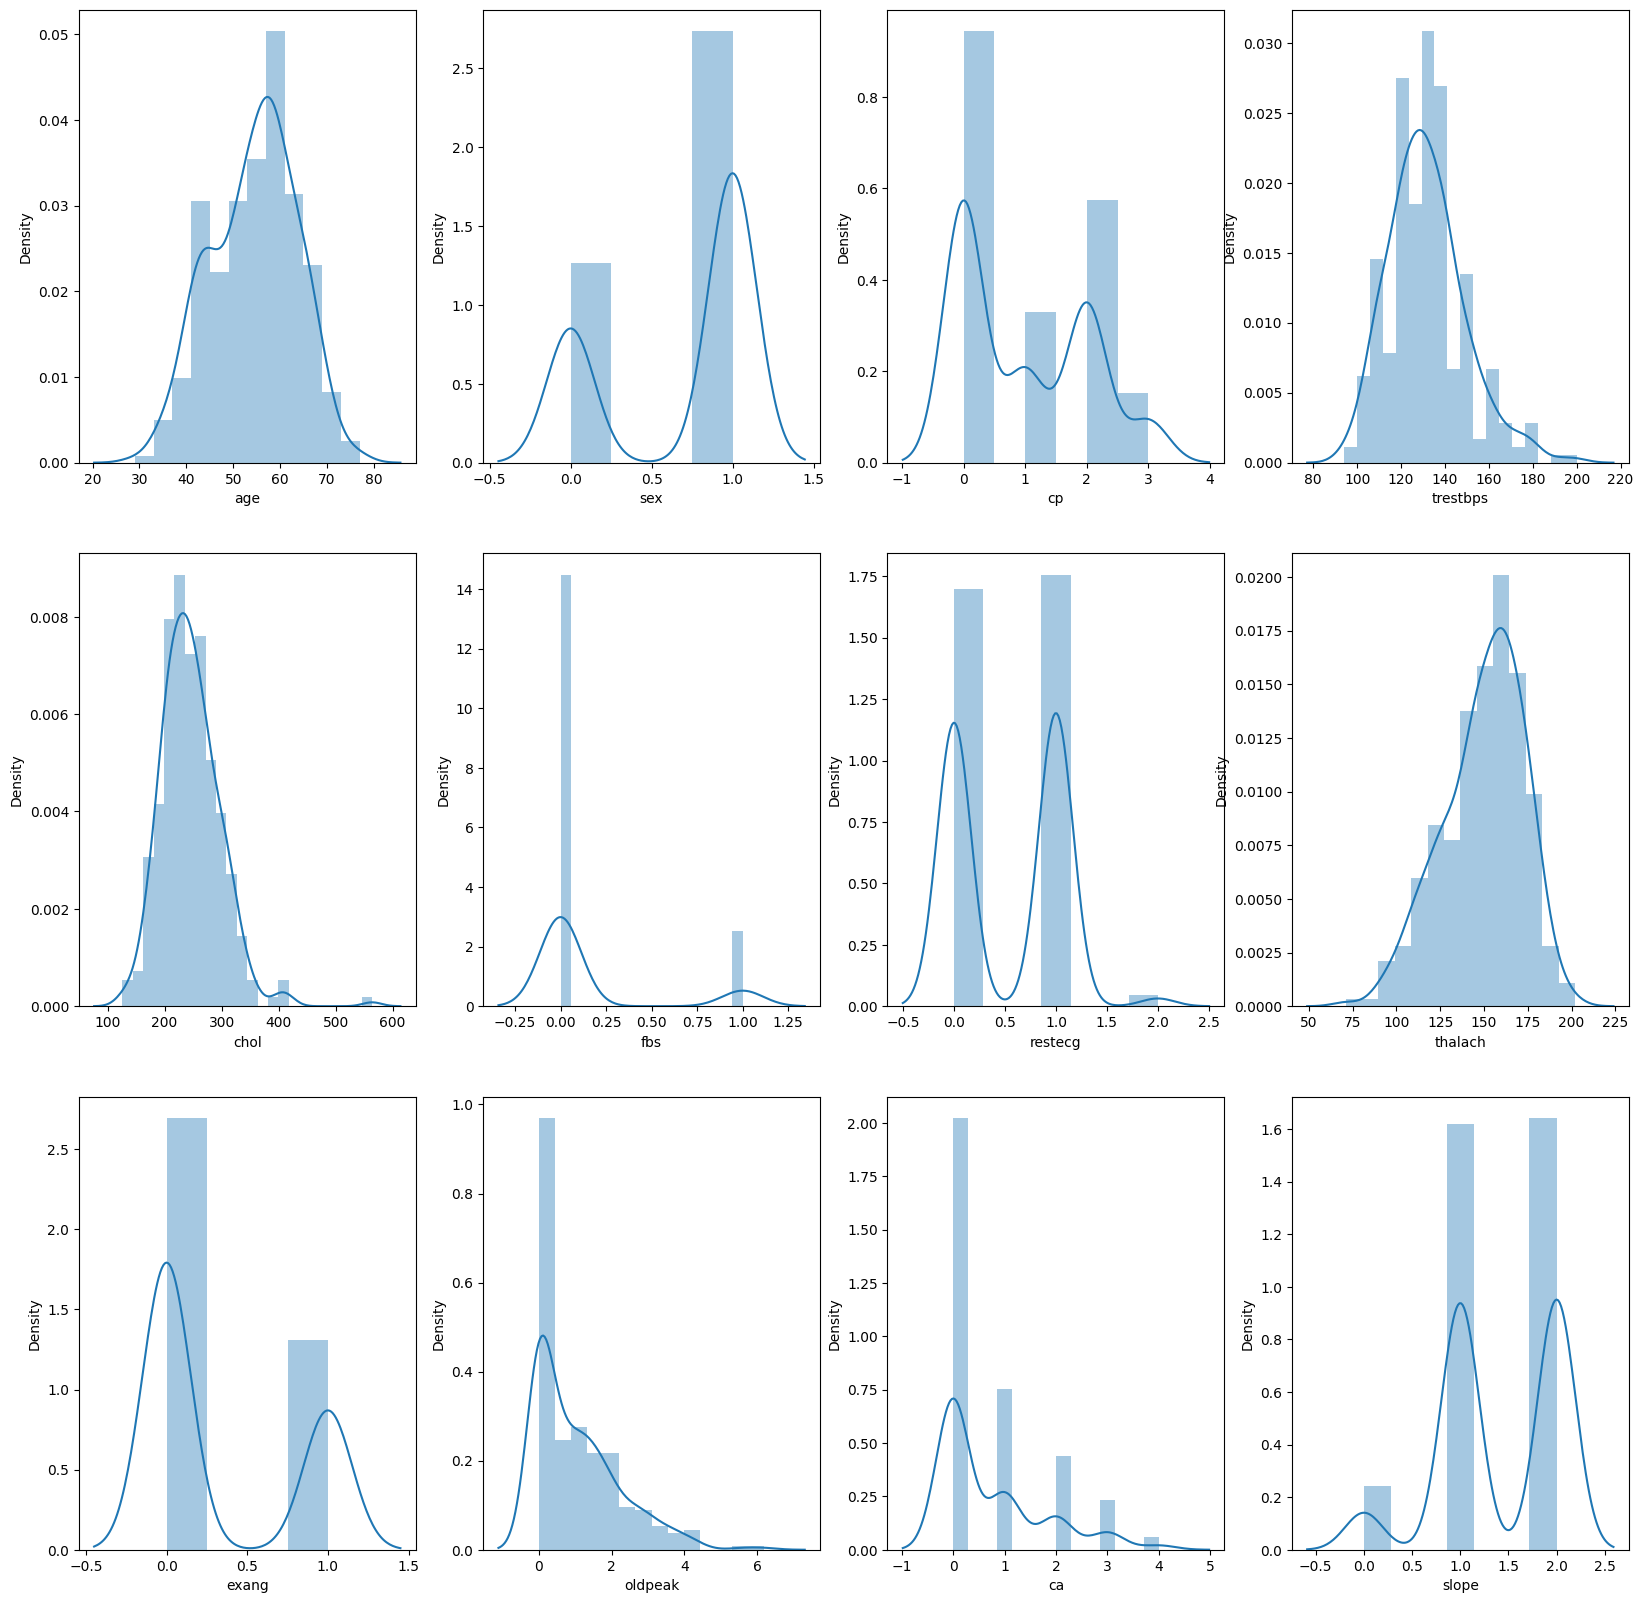

In [6]:
plt.figure(figsize=(20,20))

plt.subplot(3,4,1)
sns.distplot(heartData['age'])

plt.subplot(3,4,2)
sns.distplot(heartData['sex'])

plt.subplot(3,4,3)
sns.distplot(heartData['cp'])

plt.subplot(3,4,4)
sns.distplot(heartData['trestbps'])

plt.subplot(3,4,5)
sns.distplot(heartData['chol'])							

plt.subplot(3,4,6)
sns.distplot(heartData['fbs'])

plt.subplot(3,4,7)
sns.distplot(heartData['restecg'])

plt.subplot(3,4,8)
sns.distplot(heartData['thalach'])

plt.subplot(3,4,9)
sns.distplot(heartData['exang'])

plt.subplot(3,4,10)
sns.distplot(heartData['oldpeak'])

plt.subplot(3,4,11)
sns.distplot(heartData['ca'])

plt.subplot(3,4,12)
sns.distplot(heartData['slope'])

/tmp/ipykernel_40666/1602465366.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(oldpeaknew)


<Axes: ylabel='Density'>

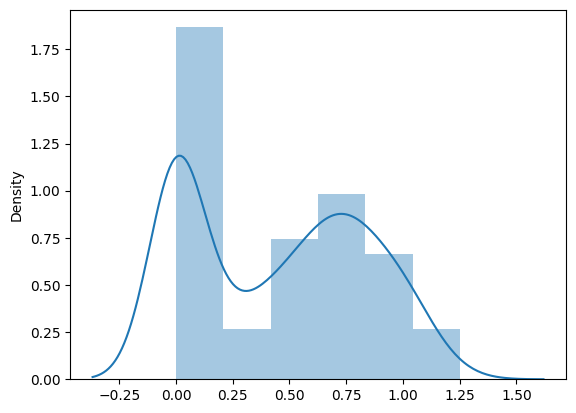

In [7]:
oldpeaknew, _ = st.yeojohnson(heartData['oldpeak'].to_numpy())
sns.distplot(oldpeaknew)

<Axes: >

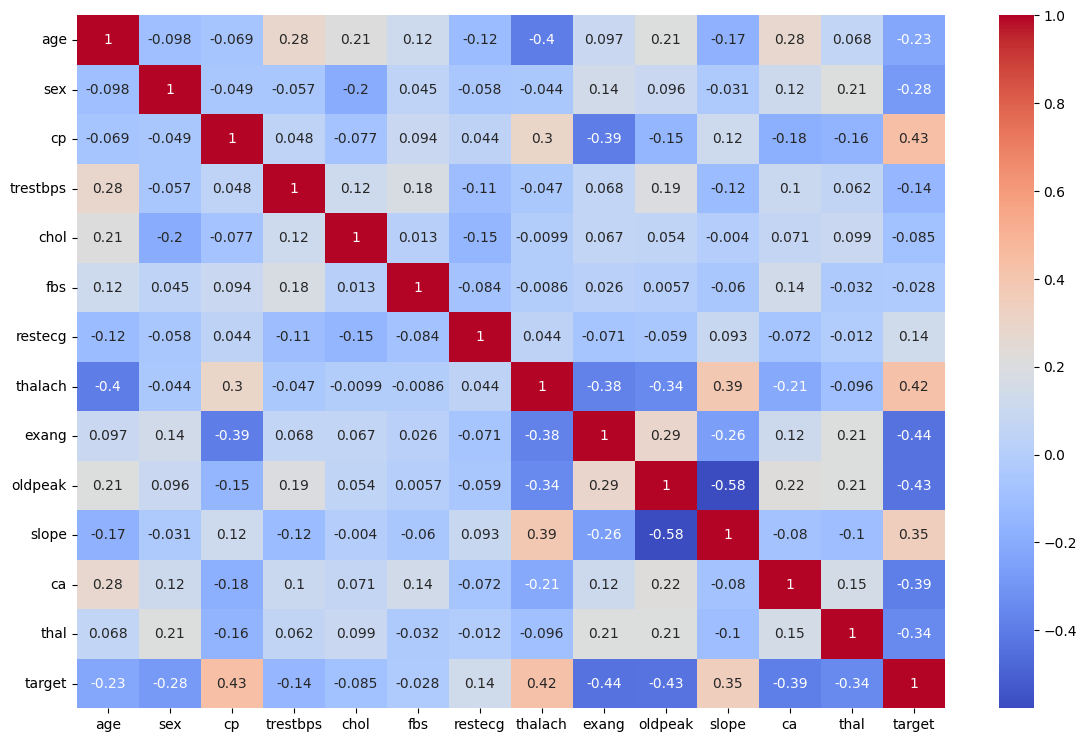

In [8]:
corr = heartData.corr()
plt.figure(figsize=(14,9))
sns.heatmap(corr, annot=True, cmap='coolwarm')

In [9]:
#the correlation matrix shows that 
# 1- chol&fbs has very little correlation with the tartget results (.085) & (.028)
# 2- trestbps and 
# 3- there is a correlation (-0.58) between oldpeak and slope they are inversily proportionl we can verify that from their correlation with the target results as well .35 & -43


In [10]:
def Feature_Extraction_no_modification(heartData):
    Y = heartData["target"].to_numpy().reshape(-1,1)
    X = heartData.drop(columns=['target'], axis=1).to_numpy()
    X = np.hstack([X, np.ones_like(Y)])
    return X, Y

def Feature_Extraction(heartData):
    Y = heartData["target"].to_numpy().reshape(-1,1)
    oldpeaknew, _ = st.yeojohnson(heartData['oldpeak'].to_numpy())
    heartData["oldpeak"] = oldpeaknew
    # given the correlation matrix these features have strong correlation with the target >> combine oldpeak slope
    heartData["new"] = heartData["oldpeak"]+heartData["slope"]
    heartData["thalach"] = heartData["thalach"]*5
    X = heartData.drop(columns=['target','chol','fbs'], axis=1).to_numpy()
    X = np.hstack([X, np.ones_like(Y)])
    return X, Y

In [11]:
class LogisticRegression():
    def __init__( self, learning_rate, iterations, l1_penality=0, l2_penality=0, eps=1e-2,costFunction="bernouli") : 
        self.learning_rate = learning_rate 
        self.iterations = iterations 
        self.l1_penality = l1_penality 
        self.l2_penality = l2_penality 
        self.eps = eps 
        self.costFunction = costFunction
        self.X = None 
        self.Y = None
        self.W = None
        # no_of_training_examples, no_of_features 
        self.m, self.n = None, None

    def __sigmoid(self,x):
        return 1/(1+np.exp(-x))
    
    def __leastSquaresCost(self):
        return np.sum(np.sqrt((self.Y - self.__leastSquaresPredict(self.X))**2))
    
    def __leastSquaresGrad(self):
        return  2 * self.X.T.dot(self.__leastSquaresPredict(self.X)-self.Y)
    
    def __bernouliCost(self):
        prediction = self.__bernouliPredict(self.X)
        eps = 1e-5
        return np.sum( (1/self.m) * (  -self.Y.T.dot(np.log(prediction+eps))  -  (1-self.Y).T.dot(np.log(1-prediction+eps))  )  )  
    
    def __bernouliGrad(self):
        return self.X.T.dot(self.__bernouliPredict(self.X)-self.Y)
    
    def __bernouliPredict(self,X): 
        return self.__sigmoid(X.dot( self.W ))
        
    def __leastSquaresPredict(self,X): 
            return X.dot( self.W )
    
    def __gradientDescentStep(self):  
        # this is the regularization term >> - self.l1_penality + 2 * self.l2_penality * self.W   
        if self.costFunction == "leastSquares":
            dW = self.__leastSquaresGrad() + self.l1_penality + 2 * self.l2_penality * self.W 
            #print("least squares cost " + str(self.__leastSquaresCost()))

        elif self.costFunction == "bernouli":
            dW = self.__bernouliGrad() + self.l1_penality + 2 * self.l2_penality * self.W
            #print("bernouli Cost " + str(self.__bernouliCost()))

        self.W = self.W - (self.learning_rate/self.m) * dW      

    def predict(self,X):
        if self.costFunction == "leastSquares":
            return self.__leastSquaresPredict(X)
        
        elif self.costFunction == "bernouli":
            return self.__bernouliPredict(X)

    def fit(self, X, Y) : 
        # no_of_training_examples, no_of_features 
        self.m, self.n = X.shape 
        self.W = np.zeros((self.n,1))#np.random.random(self.n).reshape(-1,1) 
        self.X = X 
        self.Y = Y
        if self.costFunction == "leastSquares":
            previousCost = self.__leastSquaresCost()
        elif self.costFunction == "bernouli":
            previousCost = self.__bernouliCost()


        for _ in range(self.iterations): 
                self.__gradientDescentStep() 

                if (self.costFunction == "leastSquares" and abs(self.__leastSquaresCost() - previousCost) < self.eps) or \
                   (self.costFunction == "bernouli" and abs(self.__bernouliCost() - previousCost) < self.eps) :
                    print("epsilon threshold met")
                    break
                else:
                    if self.costFunction == "leastSquares":
                        previousCost = self.__leastSquaresCost()
                    elif self.costFunction == "bernouli":
                        previousCost = self.__bernouliCost()

Training Accuracy  0.7520661157024794
Training F-score  0.7841726618705036
Validation Accuracy  0.7540983606557377
Validation F-score  0.7887323943661971


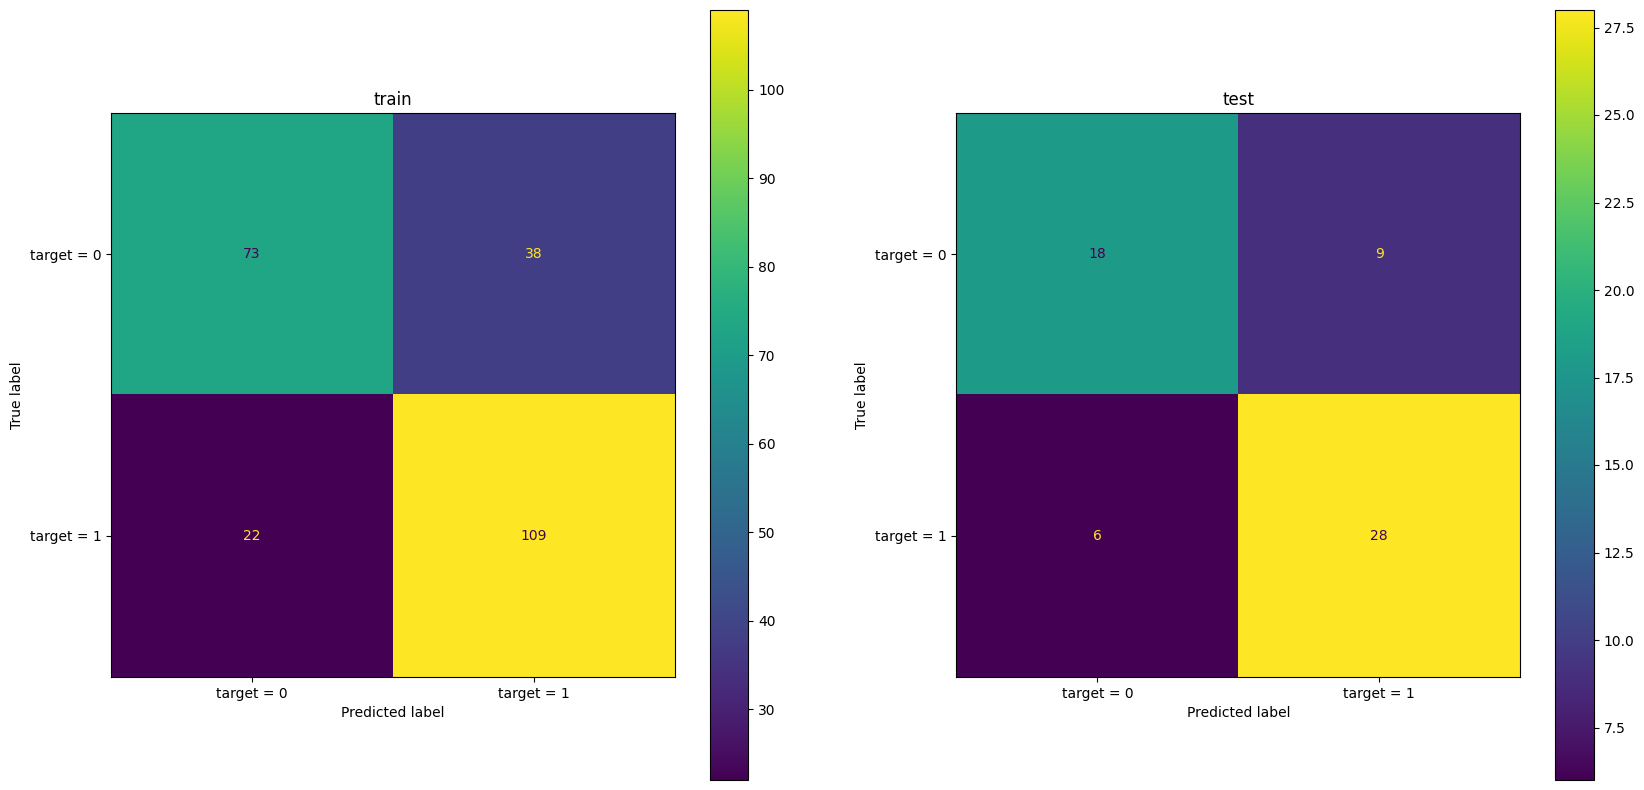

In [12]:
train, test = train_test_split(heartData, test_size=0.2,random_state=0)

XTrain, YTrain = Feature_Extraction_no_modification(train)
XTest, YTest = Feature_Extraction_no_modification(test)

# YTrain at least squares is -1 and 1
YTrain[YTrain == 0] = -1
YTest[YTest == 0] = -1

leastSquaresModel = LogisticRegression( iterations = 100000,  learning_rate = 1e-6, l1_penality = 0, l2_penality = 0,eps=1e-5, costFunction ="leastSquares" ) 

leastSquaresModel.fit(XTrain, YTrain) 


# training 
fig, ax = plt.subplots(1, 2,figsize=(20,10))

ax[0].set_title("train")
ax[1].set_title("test")

yPredicted = leastSquaresModel.predict(XTrain)
yPredicted[yPredicted>=0]=1
yPredicted[yPredicted<0]=-1
confusion_matrix = metrics.confusion_matrix(YTrain, yPredicted)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ["target = 0", "target = 1"])
cm_display.plot(ax=ax[0])

a,_=np.where(YTrain== yPredicted)
TruePositive = np.where(np.logical_and(YTrain == yPredicted , yPredicted==1))[0].shape[0]
TrueNegative = np.where(np.logical_and(YTrain == yPredicted , yPredicted==-1))[0].shape[0]
FalsePositive = np.where(np.logical_and(YTrain != yPredicted , yPredicted==1))[0].shape[0]
FalseNegative = np.where(np.logical_and(YTrain != yPredicted , yPredicted==-1))[0].shape[0]
totalPredictions = yPredicted.shape[0]
Accuracy = (TruePositive+TrueNegative)/totalPredictions # (True Positive + True Negative) / Total Predictions is 
Precision = (TruePositive)/(TruePositive+FalsePositive) # Precision True Positive / (True Positive + False Positive)
Recall = (TruePositive)/(TruePositive+FalseNegative) # Recall True Positive / (True Positive + False Negative)
F_score = 2*(Precision*Recall)/(Precision + Recall) # 2 * ((Precision * Recall) / (Precision + Recall))
print("Training Accuracy ",Accuracy)
print("Training F-score ",F_score)

# Validation

yPredictedTest = leastSquaresModel.predict(XTest)
yPredictedTest[yPredictedTest>=0]=1
yPredictedTest[yPredictedTest<0]=-1
confusion_matrix = metrics.confusion_matrix(YTest, yPredictedTest)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ["target = 0", "target = 1"])
cm_display.plot(ax=ax[1])

a,_=np.where(YTest== yPredictedTest)
TruePositive = np.where(np.logical_and(YTest == yPredictedTest , yPredictedTest==1))[0].shape[0]
TrueNegative = np.where(np.logical_and(YTest == yPredictedTest , yPredictedTest==-1))[0].shape[0]
FalsePositive = np.where(np.logical_and(YTest != yPredictedTest , yPredictedTest==1))[0].shape[0]
FalseNegative = np.where(np.logical_and(YTest != yPredictedTest , yPredictedTest==-1))[0].shape[0]
totalPredictions = yPredictedTest.shape[0]
Accuracy = (TruePositive+TrueNegative)/totalPredictions # (True Positive + True Negative) / Total Predictions is 
Precision = (TruePositive)/(TruePositive+FalsePositive) # Precision True Positive / (True Positive + False Positive)
Recall = (TruePositive)/(TruePositive+FalseNegative) # Recall True Positive / (True Positive + False Negative)
F_score = 2*(Precision*Recall)/(Precision + Recall) # 2 * ((Precision * Recall) / (Precision + Recall))
print("Validation Accuracy ",Accuracy)
print("Validation F-score ",F_score)


Training Accuracy  0.7272727272727273
Training F-score  0.7625899280575539
Validation Accuracy  0.7868852459016393
Validation F-score  0.8169014084507041


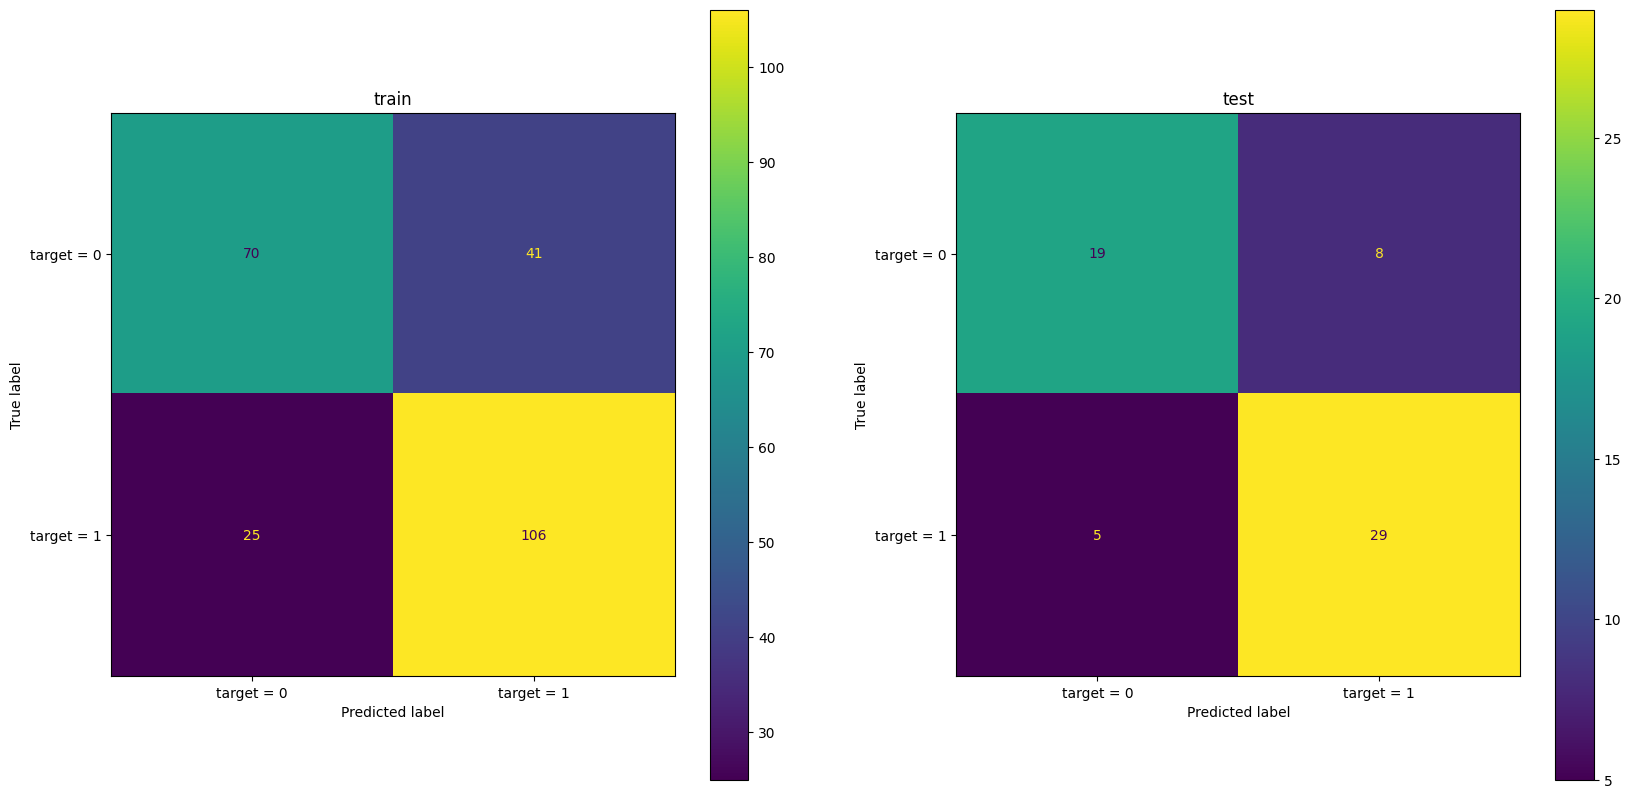

In [13]:
train, test = train_test_split(heartData, test_size=0.2,random_state=0)

XTrain, YTrain = Feature_Extraction(train)
XTest, YTest = Feature_Extraction(test)

# YTrain at least squares is -1 and 1
YTrain[YTrain == 0] = -1
YTest[YTest == 0] = -1

leastSquaresModel = LogisticRegression( iterations = 100000,  learning_rate = 1e-6, l1_penality = 0, l2_penality = 0,eps=1e-5, costFunction ="leastSquares" ) 

leastSquaresModel.fit(XTrain, YTrain) 


# training 
fig, ax = plt.subplots(1, 2,figsize=(20,10))

ax[0].set_title("train")
ax[1].set_title("test")

yPredicted = leastSquaresModel.predict(XTrain)
yPredicted[yPredicted>=0]=1
yPredicted[yPredicted<0]=-1
confusion_matrix = metrics.confusion_matrix(YTrain, yPredicted)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ["target = 0", "target = 1"])
cm_display.plot(ax=ax[0])

a,_=np.where(YTrain== yPredicted)
TruePositive = np.where(np.logical_and(YTrain == yPredicted , yPredicted==1))[0].shape[0]
TrueNegative = np.where(np.logical_and(YTrain == yPredicted , yPredicted==-1))[0].shape[0]
FalsePositive = np.where(np.logical_and(YTrain != yPredicted , yPredicted==1))[0].shape[0]
FalseNegative = np.where(np.logical_and(YTrain != yPredicted , yPredicted==-1))[0].shape[0]
totalPredictions = yPredicted.shape[0]
Accuracy = (TruePositive+TrueNegative)/totalPredictions # (True Positive + True Negative) / Total Predictions is 
Precision = (TruePositive)/(TruePositive+FalsePositive) # Precision True Positive / (True Positive + False Positive)
Recall = (TruePositive)/(TruePositive+FalseNegative) # Recall True Positive / (True Positive + False Negative)
F_score = 2*(Precision*Recall)/(Precision + Recall) # 2 * ((Precision * Recall) / (Precision + Recall))
print("Training Accuracy ",Accuracy)
print("Training F-score ",F_score)

# Validation

yPredictedTest = leastSquaresModel.predict(XTest)
yPredictedTest[yPredictedTest>=0]=1
yPredictedTest[yPredictedTest<0]=-1
confusion_matrix = metrics.confusion_matrix(YTest, yPredictedTest)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ["target = 0", "target = 1"])
cm_display.plot(ax=ax[1])

a,_=np.where(YTest== yPredictedTest)
TruePositive = np.where(np.logical_and(YTest == yPredictedTest , yPredictedTest==1))[0].shape[0]
TrueNegative = np.where(np.logical_and(YTest == yPredictedTest , yPredictedTest==-1))[0].shape[0]
FalsePositive = np.where(np.logical_and(YTest != yPredictedTest , yPredictedTest==1))[0].shape[0]
FalseNegative = np.where(np.logical_and(YTest != yPredictedTest , yPredictedTest==-1))[0].shape[0]
totalPredictions = yPredictedTest.shape[0]
Accuracy = (TruePositive+TrueNegative)/totalPredictions # (True Positive + True Negative) / Total Predictions is 
Precision = (TruePositive)/(TruePositive+FalsePositive) # Precision True Positive / (True Positive + False Positive)
Recall = (TruePositive)/(TruePositive+FalseNegative) # Recall True Positive / (True Positive + False Negative)
F_score = 2*(Precision*Recall)/(Precision + Recall) # 2 * ((Precision * Recall) / (Precision + Recall))
print("Validation Accuracy ",Accuracy)
print("Validation F-score ",F_score)

Training Accuracy  0.7520661157024794
Training F-score  0.7841726618705036
Validation Accuracy  0.7868852459016393
Validation F-score  0.8169014084507041


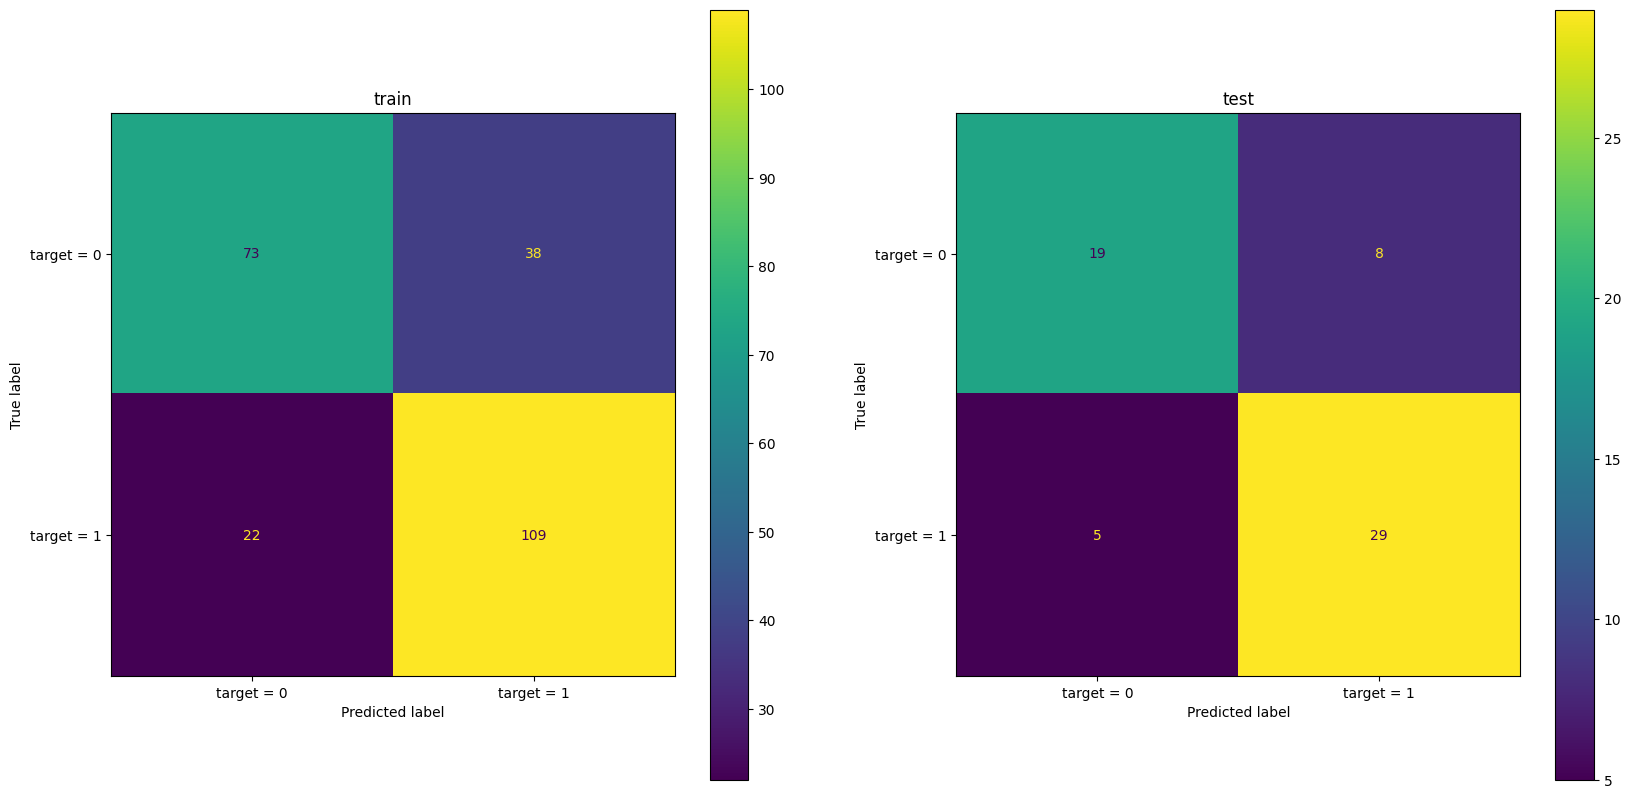

In [14]:
# Regularization ----------------------------
train, test = train_test_split(heartData, test_size=0.2,random_state=0)

XTrain, YTrain = Feature_Extraction_no_modification(train)
XTest, YTest = Feature_Extraction_no_modification(test)

# YTrain at least squares is -1 and 1
YTrain[YTrain == 0] = -1
YTest[YTest == 0] = -1

leastSquaresModel = LogisticRegression( iterations = 100000,  learning_rate = 1e-6, l1_penality = 100, l2_penality = 100,eps=1e-5, costFunction ="leastSquares" ) 

leastSquaresModel.fit(XTrain, YTrain) 


# training 
fig, ax = plt.subplots(1, 2,figsize=(20,10))

ax[0].set_title("train")
ax[1].set_title("test")

yPredicted = leastSquaresModel.predict(XTrain)
yPredicted[yPredicted>=0]=1
yPredicted[yPredicted<0]=-1
confusion_matrix = metrics.confusion_matrix(YTrain, yPredicted)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ["target = 0", "target = 1"])
cm_display.plot(ax=ax[0])

a,_=np.where(YTrain== yPredicted)
TruePositive = np.where(np.logical_and(YTrain == yPredicted , yPredicted==1))[0].shape[0]
TrueNegative = np.where(np.logical_and(YTrain == yPredicted , yPredicted==-1))[0].shape[0]
FalsePositive = np.where(np.logical_and(YTrain != yPredicted , yPredicted==1))[0].shape[0]
FalseNegative = np.where(np.logical_and(YTrain != yPredicted , yPredicted==-1))[0].shape[0]
totalPredictions = yPredicted.shape[0]
Accuracy = (TruePositive+TrueNegative)/totalPredictions # (True Positive + True Negative) / Total Predictions is 
Precision = (TruePositive)/(TruePositive+FalsePositive) # Precision True Positive / (True Positive + False Positive)
Recall = (TruePositive)/(TruePositive+FalseNegative) # Recall True Positive / (True Positive + False Negative)
F_score = 2*(Precision*Recall)/(Precision + Recall) # 2 * ((Precision * Recall) / (Precision + Recall))
print("Training Accuracy ",Accuracy)
print("Training F-score ",F_score)

# Validation

yPredictedTest = leastSquaresModel.predict(XTest)
yPredictedTest[yPredictedTest>=0]=1
yPredictedTest[yPredictedTest<0]=-1
confusion_matrix = metrics.confusion_matrix(YTest, yPredictedTest)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ["target = 0", "target = 1"])
cm_display.plot(ax=ax[1])

a,_=np.where(YTest== yPredictedTest)
TruePositive = np.where(np.logical_and(YTest == yPredictedTest , yPredictedTest==1))[0].shape[0]
TrueNegative = np.where(np.logical_and(YTest == yPredictedTest , yPredictedTest==-1))[0].shape[0]
FalsePositive = np.where(np.logical_and(YTest != yPredictedTest , yPredictedTest==1))[0].shape[0]
FalseNegative = np.where(np.logical_and(YTest != yPredictedTest , yPredictedTest==-1))[0].shape[0]
totalPredictions = yPredictedTest.shape[0]
Accuracy = (TruePositive+TrueNegative)/totalPredictions # (True Positive + True Negative) / Total Predictions is 
Precision = (TruePositive)/(TruePositive+FalsePositive) # Precision True Positive / (True Positive + False Positive)
Recall = (TruePositive)/(TruePositive+FalseNegative) # Recall True Positive / (True Positive + False Negative)
F_score = 2*(Precision*Recall)/(Precision + Recall) # 2 * ((Precision * Recall) / (Precision + Recall))
print("Validation Accuracy ",Accuracy)
print("Validation F-score ",F_score)


epsilon threshold met
Training Accuracy  0.45454545454545453
Training F-score  0.7612456747404844
Validation Accuracy  0.5409836065573771
Validation F-score  0.8148148148148148


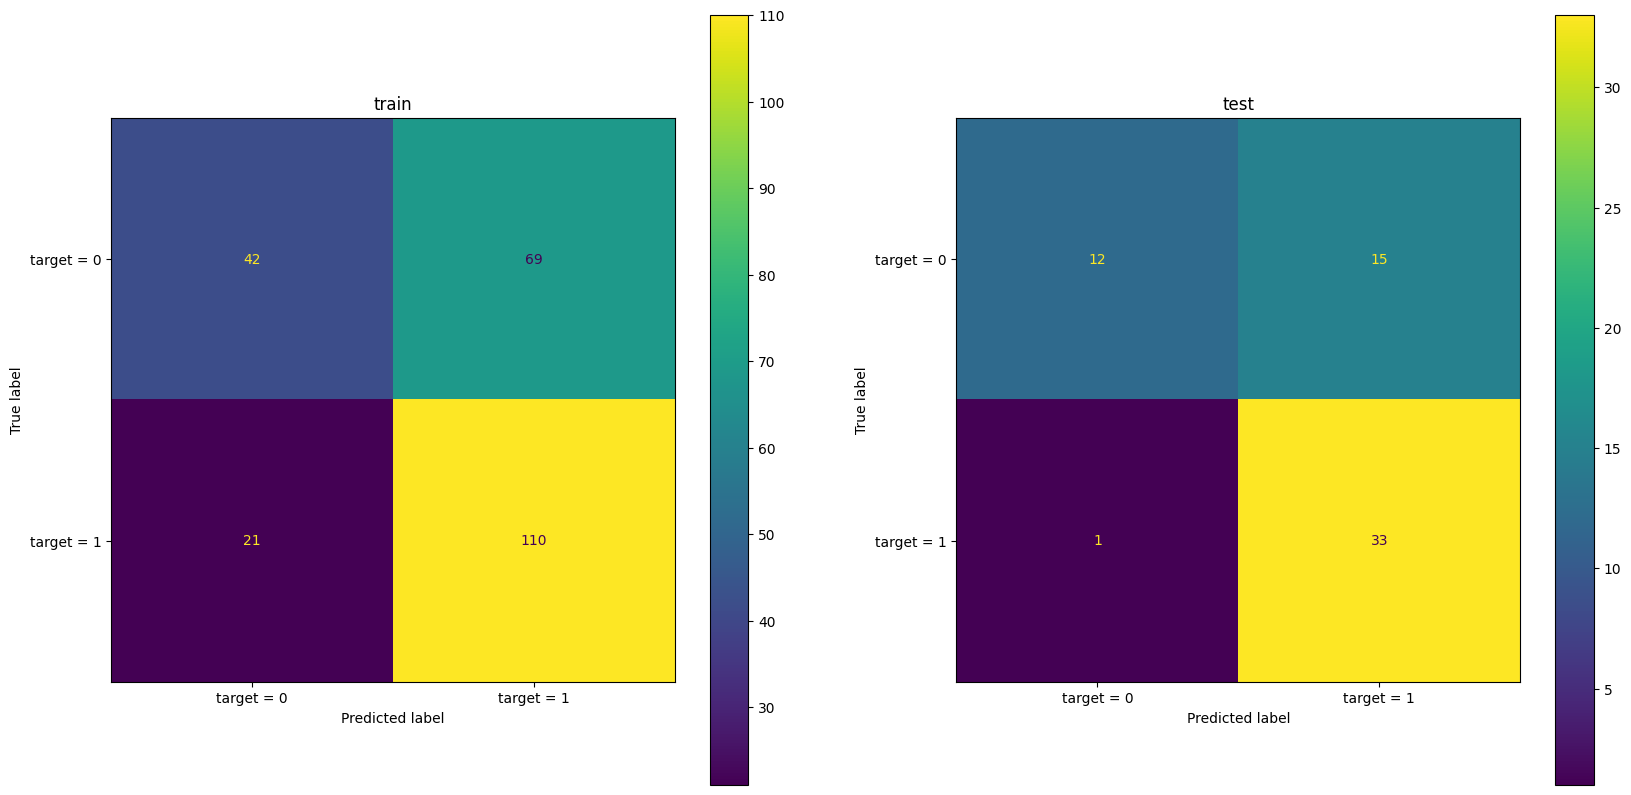

In [15]:
train, test = train_test_split(heartData, test_size=0.2,random_state=0)
XTrain, YTrain = Feature_Extraction_no_modification(train)
XTest, YTest = Feature_Extraction_no_modification(test)

bernouliModel = LogisticRegression( iterations = 100000,  learning_rate = 1e-6, l1_penality = 0, l2_penality = 0,eps=1e-5, costFunction ="bernouli" ) 
bernouliModel.fit(XTrain, YTrain) 


# training 
fig, ax = plt.subplots(1, 2,figsize=(20,10))

ax[0].set_title("train")
ax[1].set_title("test")

yPredicted = bernouliModel.predict(XTrain) 
yPredicted[yPredicted>=0.5]=1
yPredicted[yPredicted<0.5]=0
confusion_matrix = metrics.confusion_matrix(YTrain, yPredicted)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ["target = 0", "target = 1"])
cm_display.plot(ax=ax[0])

a,_=np.where(YTrain== yPredicted)
TruePositive = np.where(np.logical_and(YTrain == yPredicted , yPredicted==1))[0].shape[0]
TrueNegative = np.where(np.logical_and(YTrain == yPredicted , yPredicted==-1))[0].shape[0]
FalsePositive = np.where(np.logical_and(YTrain != yPredicted , yPredicted==1))[0].shape[0]
FalseNegative = np.where(np.logical_and(YTrain != yPredicted , yPredicted==-1))[0].shape[0]
totalPredictions = yPredicted.shape[0]
Accuracy = (TruePositive+TrueNegative)/totalPredictions # (True Positive + True Negative) / Total Predictions is 
Precision = (TruePositive)/(TruePositive+FalsePositive) # Precision True Positive / (True Positive + False Positive)
Recall = (TruePositive)/(TruePositive+FalseNegative) # Recall True Positive / (True Positive + False Negative)
F_score = 2*(Precision*Recall)/(Precision + Recall) # 2 * ((Precision * Recall) / (Precision + Recall))
print("Training Accuracy ",Accuracy)
print("Training F-score ",F_score)

# Validation

yPredictedTest = bernouliModel.predict(XTest) 
yPredictedTest[yPredictedTest>=0.5]=1
yPredictedTest[yPredictedTest<0.5]=0
confusion_matrix = metrics.confusion_matrix(YTest, yPredictedTest)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ["target = 0", "target = 1"])
cm_display.plot(ax=ax[1])

a,_=np.where(YTest== yPredictedTest)
TruePositive = np.where(np.logical_and(YTest == yPredictedTest , yPredictedTest==1))[0].shape[0]
TrueNegative = np.where(np.logical_and(YTest == yPredictedTest , yPredictedTest==-1))[0].shape[0]
FalsePositive = np.where(np.logical_and(YTest != yPredictedTest , yPredictedTest==1))[0].shape[0]
FalseNegative = np.where(np.logical_and(YTest != yPredictedTest , yPredictedTest==-1))[0].shape[0]
totalPredictions = yPredictedTest.shape[0]
Accuracy = (TruePositive+TrueNegative)/totalPredictions # (True Positive + True Negative) / Total Predictions is 
Precision = (TruePositive)/(TruePositive+FalsePositive) # Precision True Positive / (True Positive + False Positive)
Recall = (TruePositive)/(TruePositive+FalseNegative) # Recall True Positive / (True Positive + False Negative)
F_score = 2*(Precision*Recall)/(Precision + Recall) # 2 * ((Precision * Recall) / (Precision + Recall))
print("Validation Accuracy ",Accuracy)
print("Validation F-score ",F_score)


epsilon threshold met
Training Accuracy  0.47520661157024796
Training F-score  0.7666666666666667
Validation Accuracy  0.4918032786885246
Validation F-score  0.7894736842105263


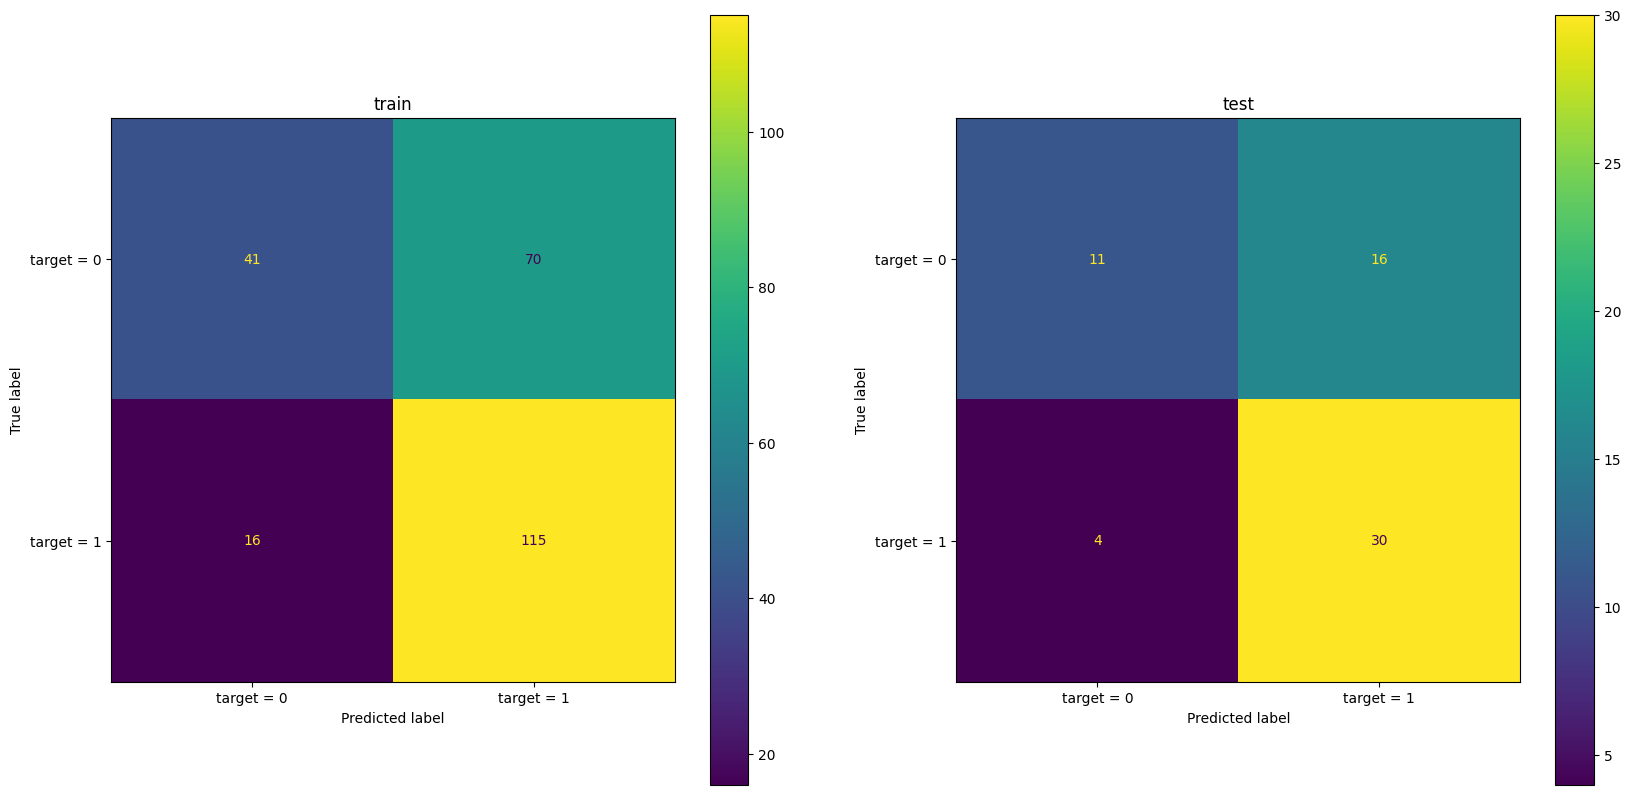

In [16]:
train, test = train_test_split(heartData, test_size=0.2,random_state=0)
XTrain, YTrain = Feature_Extraction(train)
XTest, YTest = Feature_Extraction(test)

bernouliModel = LogisticRegression( iterations = 100000,  learning_rate = 1e-6, l1_penality = 0, l2_penality = 0,eps=1e-5, costFunction ="bernouli" ) 
bernouliModel.fit(XTrain, YTrain) 


# training 
fig, ax = plt.subplots(1, 2,figsize=(20,10))

ax[0].set_title("train")
ax[1].set_title("test")

yPredicted = bernouliModel.predict(XTrain) 
yPredicted[yPredicted>=0.5]=1
yPredicted[yPredicted<0.5]=0
confusion_matrix = metrics.confusion_matrix(YTrain, yPredicted)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ["target = 0", "target = 1"])
cm_display.plot(ax=ax[0])

a,_=np.where(YTrain== yPredicted)
TruePositive = np.where(np.logical_and(YTrain == yPredicted , yPredicted==1))[0].shape[0]
TrueNegative = np.where(np.logical_and(YTrain == yPredicted , yPredicted==-1))[0].shape[0]
FalsePositive = np.where(np.logical_and(YTrain != yPredicted , yPredicted==1))[0].shape[0]
FalseNegative = np.where(np.logical_and(YTrain != yPredicted , yPredicted==-1))[0].shape[0]
totalPredictions = yPredicted.shape[0]
Accuracy = (TruePositive+TrueNegative)/totalPredictions # (True Positive + True Negative) / Total Predictions is 
Precision = (TruePositive)/(TruePositive+FalsePositive) # Precision True Positive / (True Positive + False Positive)
Recall = (TruePositive)/(TruePositive+FalseNegative) # Recall True Positive / (True Positive + False Negative)
F_score = 2*(Precision*Recall)/(Precision + Recall) # 2 * ((Precision * Recall) / (Precision + Recall))
print("Training Accuracy ",Accuracy)
print("Training F-score ",F_score)

# Validation

yPredictedTest = bernouliModel.predict(XTest) 
yPredictedTest[yPredictedTest>=0.5]=1
yPredictedTest[yPredictedTest<0.5]=0
confusion_matrix = metrics.confusion_matrix(YTest, yPredictedTest)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ["target = 0", "target = 1"])
cm_display.plot(ax=ax[1])

a,_=np.where(YTest== yPredictedTest)
TruePositive = np.where(np.logical_and(YTest == yPredictedTest , yPredictedTest==1))[0].shape[0]
TrueNegative = np.where(np.logical_and(YTest == yPredictedTest , yPredictedTest==-1))[0].shape[0]
FalsePositive = np.where(np.logical_and(YTest != yPredictedTest , yPredictedTest==1))[0].shape[0]
FalseNegative = np.where(np.logical_and(YTest != yPredictedTest , yPredictedTest==-1))[0].shape[0]
totalPredictions = yPredictedTest.shape[0]
Accuracy = (TruePositive+TrueNegative)/totalPredictions # (True Positive + True Negative) / Total Predictions is 
Precision = (TruePositive)/(TruePositive+FalsePositive) # Precision True Positive / (True Positive + False Positive)
Recall = (TruePositive)/(TruePositive+FalseNegative) # Recall True Positive / (True Positive + False Negative)
F_score = 2*(Precision*Recall)/(Precision + Recall) # 2 * ((Precision * Recall) / (Precision + Recall))
print("Validation Accuracy ",Accuracy)
print("Validation F-score ",F_score)


epsilon threshold met
Training Accuracy  0.4214876033057851
Training F-score  0.825910931174089
Validation Accuracy  0.4262295081967213
Validation F-score  0.8253968253968255


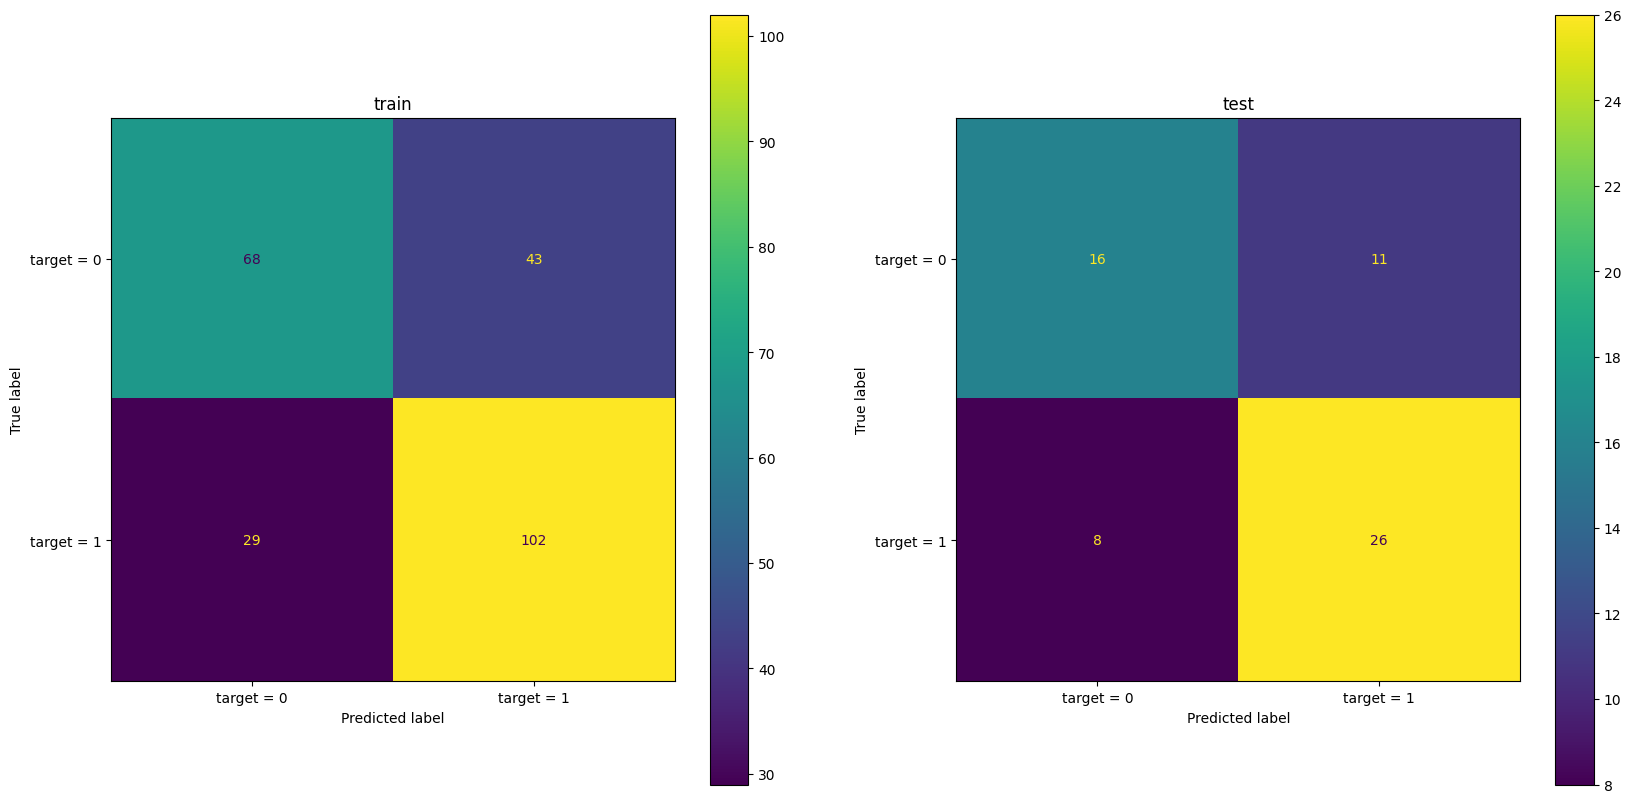

In [17]:
# Regularization ---------------------------
train, test = train_test_split(heartData, test_size=0.2,random_state=0)
XTrain, YTrain = Feature_Extraction_no_modification(train)
XTest, YTest = Feature_Extraction_no_modification(test)

bernouliModel = LogisticRegression( iterations = 100000,  learning_rate = 1e-6, l1_penality = 1000, l2_penality = 1000,eps=1e-5, costFunction ="bernouli" ) 
bernouliModel.fit(XTrain, YTrain) 


# training 
fig, ax = plt.subplots(1, 2,figsize=(20,10))

ax[0].set_title("train")
ax[1].set_title("test")

yPredicted = bernouliModel.predict(XTrain) 
yPredicted[yPredicted>=0.5]=1
yPredicted[yPredicted<0.5]=0
confusion_matrix = metrics.confusion_matrix(YTrain, yPredicted)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ["target = 0", "target = 1"])
cm_display.plot(ax=ax[0])

a,_=np.where(YTrain== yPredicted)
TruePositive = np.where(np.logical_and(YTrain == yPredicted , yPredicted==1))[0].shape[0]
TrueNegative = np.where(np.logical_and(YTrain == yPredicted , yPredicted==-1))[0].shape[0]
FalsePositive = np.where(np.logical_and(YTrain != yPredicted , yPredicted==1))[0].shape[0]
FalseNegative = np.where(np.logical_and(YTrain != yPredicted , yPredicted==-1))[0].shape[0]
totalPredictions = yPredicted.shape[0]
Accuracy = (TruePositive+TrueNegative)/totalPredictions # (True Positive + True Negative) / Total Predictions is 
Precision = (TruePositive)/(TruePositive+FalsePositive) # Precision True Positive / (True Positive + False Positive)
Recall = (TruePositive)/(TruePositive+FalseNegative) # Recall True Positive / (True Positive + False Negative)
F_score = 2*(Precision*Recall)/(Precision + Recall) # 2 * ((Precision * Recall) / (Precision + Recall))
print("Training Accuracy ",Accuracy)
print("Training F-score ",F_score)

# Validation

yPredictedTest = bernouliModel.predict(XTest) 
yPredictedTest[yPredictedTest>=0.5]=1
yPredictedTest[yPredictedTest<0.5]=0
confusion_matrix = metrics.confusion_matrix(YTest, yPredictedTest)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ["target = 0", "target = 1"])
cm_display.plot(ax=ax[1])

a,_=np.where(YTest== yPredictedTest)
TruePositive = np.where(np.logical_and(YTest == yPredictedTest , yPredictedTest==1))[0].shape[0]
TrueNegative = np.where(np.logical_and(YTest == yPredictedTest , yPredictedTest==-1))[0].shape[0]
FalsePositive = np.where(np.logical_and(YTest != yPredictedTest , yPredictedTest==1))[0].shape[0]
FalseNegative = np.where(np.logical_and(YTest != yPredictedTest , yPredictedTest==-1))[0].shape[0]
totalPredictions = yPredictedTest.shape[0]
Accuracy = (TruePositive+TrueNegative)/totalPredictions # (True Positive + True Negative) / Total Predictions is 
Precision = (TruePositive)/(TruePositive+FalsePositive) # Precision True Positive / (True Positive + False Positive)
Recall = (TruePositive)/(TruePositive+FalseNegative) # Recall True Positive / (True Positive + False Negative)
F_score = 2*(Precision*Recall)/(Precision + Recall) # 2 * ((Precision * Recall) / (Precision + Recall))
print("Validation Accuracy ",Accuracy)
print("Validation F-score ",F_score)

# k-fold cross-validation 

In [18]:
from sklearn.model_selection import KFold


In [19]:
kfolds = 4
kf = KFold(n_splits=kfolds)
for trainIdx, testIdx in kf.split(heartData):
    train = heartData.iloc[trainIdx]
    test =  heartData.iloc[testIdx]
    print(train.shape)

(227, 14)
(227, 14)
(227, 14)
(228, 14)


In [52]:

kfolds = 10
kf = KFold(n_splits=kfolds)
Accuracy = []
for trainIdx, testIdx in kf.split(heartData):
    train = heartData.iloc[trainIdx]
    test =  heartData.iloc[testIdx]
    XTrain, YTrain = Feature_Extraction_no_modification(train)
    XTest, YTest = Feature_Extraction_no_modification(test)

    bernouliModel = LogisticRegression( iterations = 10000,  learning_rate = 1e-6, l1_penality = 1000, l2_penality = 1000,eps=1e-6, costFunction ="bernouli" ) 
    bernouliModel.fit(XTrain, YTrain) 


    # Validation

    yPredictedTest = bernouliModel.predict(XTest) 
    yPredictedTest[yPredictedTest>=0.5]=1
    yPredictedTest[yPredictedTest<0.5]=0

    a,_=np.where(YTest== yPredictedTest)
    TruePositive = np.where(np.logical_and(YTest == yPredictedTest , yPredictedTest==1))[0].shape[0]
    TrueNegative = np.where(np.logical_and(YTest == yPredictedTest , yPredictedTest==-1))[0].shape[0]
    FalsePositive = np.where(np.logical_and(YTest != yPredictedTest , yPredictedTest==1))[0].shape[0]
    FalseNegative = np.where(np.logical_and(YTest != yPredictedTest , yPredictedTest==-1))[0].shape[0]
    totalPredictions = yPredictedTest.shape[0]
    Accuracy.append((TruePositive+TrueNegative)/totalPredictions) # (True Positive + True Negative) / Total Predictions is 
    #Precision = (TruePositive)/(TruePositive+FalsePositive) # Precision True Positive / (True Positive + False Positive)
    #Recall = (TruePositive)/(TruePositive+FalseNegative) # Recall True Positive / (True Positive + False Negative)
    #F_scores.append(2*(Precision*Recall)/(Precision + Recall)) # 2 * ((Precision * Recall) / (Precision + Recall))
    



/tmp/ipykernel_40666/1288011654.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Accuracy,bins=5)


<Axes: ylabel='Density'>

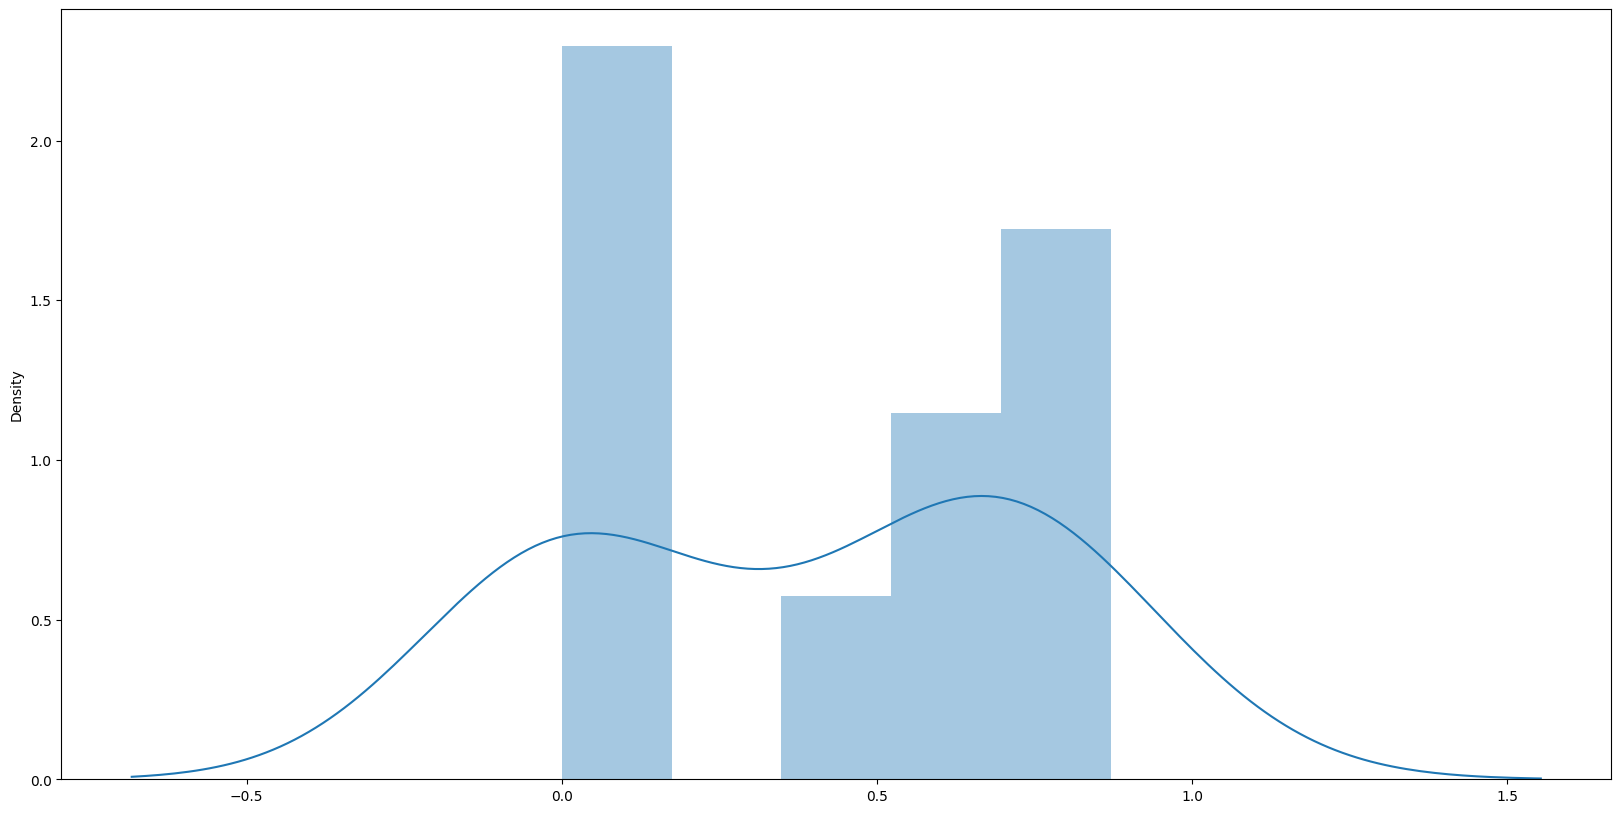

In [53]:
plt.figure(figsize=(20,10))
sns.distplot(Accuracy,bins=5)

In [34]:

kfolds = 10
kf = KFold(n_splits=kfolds)
Accuracy = []
for trainIdx, testIdx in kf.split(heartData):
    train = heartData.iloc[trainIdx]
    test =  heartData.iloc[testIdx]
    XTrain, YTrain = Feature_Extraction_no_modification(train)
    XTest, YTest = Feature_Extraction_no_modification(test)

    # YTrain at least squares is -1 and 1
    YTrain[YTrain == 0] = -1
    YTest[YTest == 0] = -1

    leastSquaresModel = LogisticRegression( iterations = 100000,  learning_rate = 1e-6, l1_penality = 100, l2_penality = 100,eps=1e-5, costFunction ="leastSquares" ) 

    leastSquaresModel.fit(XTrain, YTrain) 

    yPredictedTest = leastSquaresModel.predict(XTest)
    yPredictedTest[yPredictedTest>=0]=1
    yPredictedTest[yPredictedTest<0]=-1

    a,_=np.where(YTest== yPredictedTest)
    TruePositive = np.where(np.logical_and(YTest == yPredictedTest , yPredictedTest==1))[0].shape[0]
    TrueNegative = np.where(np.logical_and(YTest == yPredictedTest , yPredictedTest==-1))[0].shape[0]
    FalsePositive = np.where(np.logical_and(YTest != yPredictedTest , yPredictedTest==1))[0].shape[0]
    FalseNegative = np.where(np.logical_and(YTest != yPredictedTest , yPredictedTest==-1))[0].shape[0]
    totalPredictions = yPredictedTest.shape[0]
    Accuracy.append((TruePositive+TrueNegative)/totalPredictions) # (True Positive + True Negative) / Total Predictions is 
    #Precision = (TruePositive)/(TruePositive+FalsePositive) # Precision True Positive / (True Positive + False Positive)
    #Recall = (TruePositive)/(TruePositive+FalseNegative) # Recall True Positive / (True Positive + False Negative)
    #F_scores.append(2*(Precision*Recall)/(Precision + Recall)) # 2 * ((Precision * Recall) / (Precision + Recall))
    



/tmp/ipykernel_40666/1288011654.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Accuracy,bins=5)


<Axes: ylabel='Density'>

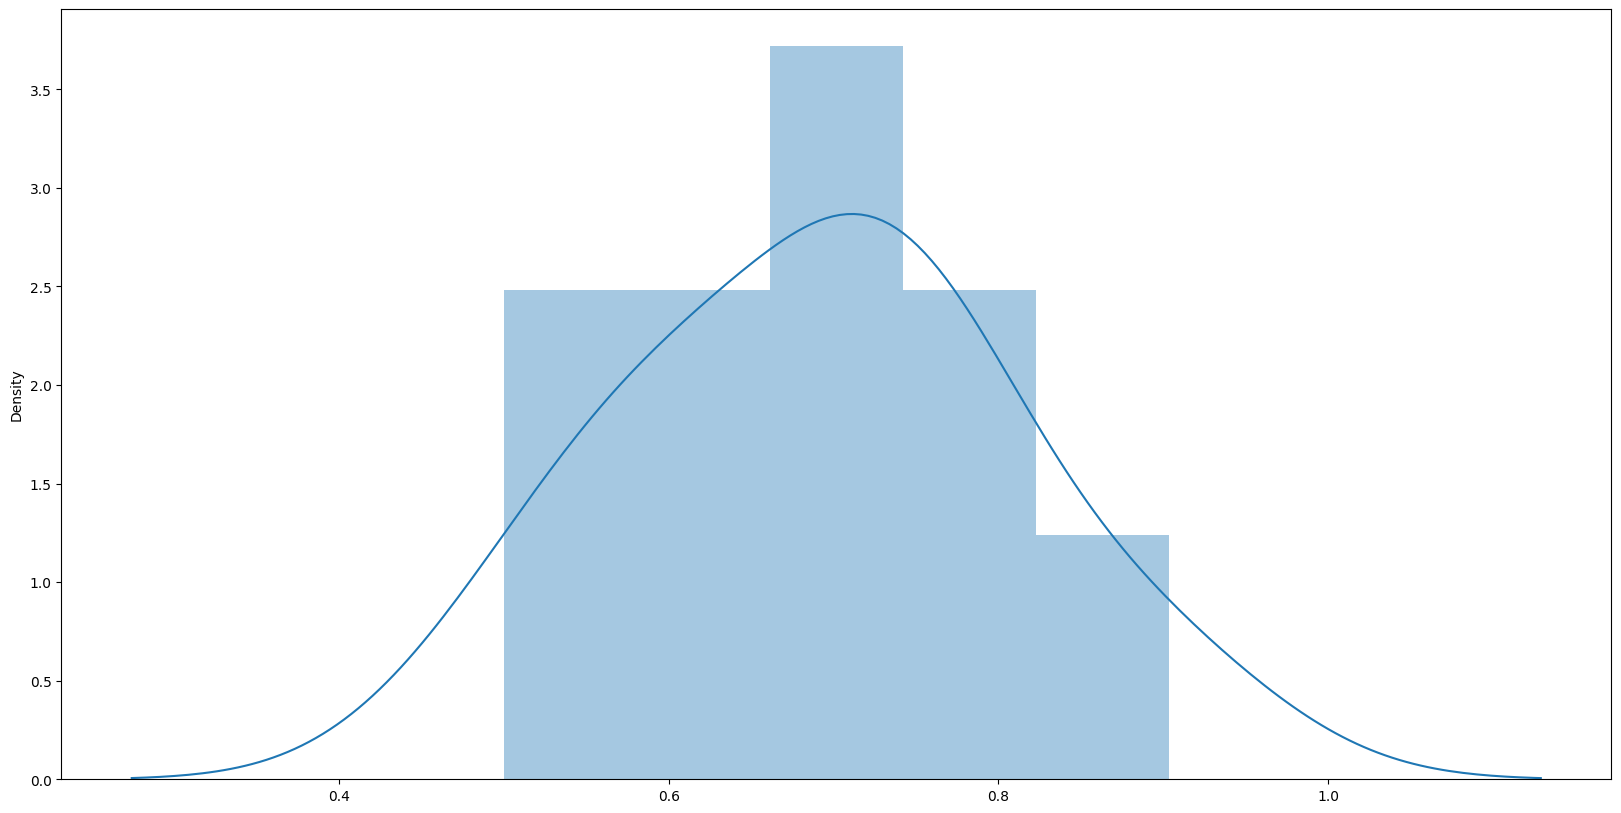

In [35]:
plt.figure(figsize=(20,10))
sns.distplot(Accuracy,bins=5)

In [37]:
np.array(Accuracy).mean()

0.6918279569892473

In [38]:
np.array(Accuracy).std()

0.11321125415781214